### Header with description

**Changes from the fourth submission in the last assignment**

* Added a function to do image normalization
* Created custom loss function to add l2 regularization to the categorical cross entropy function
* Moved activation layer to next to the batch normalization layer
* Added code to display and download 26 misclassified images

### Import Libraries and modules

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_test_bkp = X_test.copy()

(60000, 28, 28)


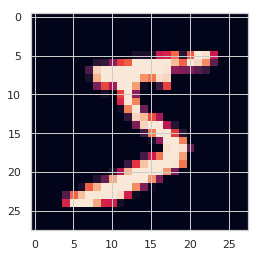

In [127]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Image Normalization

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


def image_normalize(X):                   #Created a function to normalize the image by stretching the pixel values between 0 and 255
  for i in range(X.shape[0]):
    T = X[i]
    T = ((T - T.min())/(T.max() - T.min())) * 255
    X[i] = T
  return X
    
X_train = image_normalize(X_train)
X_test = image_normalize(X_test) 


In [67]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [69]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Build Model

In [70]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Convolution2D(8, 3, 3, input_shape=(28,28,1), use_bias=False)) # 26, RF=3x3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, use_bias=False)) #24, RF=5x5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, use_bias=False)) #22, RF=7x7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(8, 1, use_bias=False)) #22, RF=7x7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #11, RF=14x14

model.add(Convolution2D(8, 3, 3, use_bias=False)) #9, RF=16x16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, use_bias=False)) #7, RF=18x18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, use_bias=False)) #5, RF=20x20
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, use_bias=False)) #3, RF=22x22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, use_bias=False)) #3, RF=22x22
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 3, use_bias=False))

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1..., use_bias=False)`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), use_bias=False)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1152      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
__________

### Custom loss function to add l2 regularization in the cross entropy loss

In [0]:
def cross_entropy_regularized(y_true, y_pred):
    
    l2_regularization = K.mean(K.square(y_pred - y_true), axis=-1) + K.epsilon()   # Added epsilon just to avoid differenciation issue if the MSE is zero at all
    loss = K.categorical_crossentropy(y_true, y_pred) + l2_regularization
    
    return loss


### Checkpoint Configuration to save the best model

In [73]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [78]:
!ls "/content/gdrive/My Drive/EVA"

S3V2  S4  S5


In [0]:
!pip install -q h5py pyyaml
from keras.models import model_from_json

In [0]:
from keras.callbacks import *
filepath="/content/gdrive/My Drive/EVA/S5/epochs:{epoch:03d}-val_acc:{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')

In [0]:
callbacks_list = [checkpoint]

### Compile the model with custom loss function and train for 40 Epochs

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  if epoch % 10 == 0:
    lr = lr * 0.5
  return lr

model.compile(loss=cross_entropy_regularized,                          # Custom loss function: Categorical cross entropy with l2 regularization
             optimizer=Adam(lr=0.02),
             metrics=['accuracy'])

callbacks_list = [LearningRateScheduler(scheduler, verbose=1), checkpoint]

In [82]:
model.fit(X_train, Y_train, batch_size=256, validation_data=(X_test, Y_test), nb_epoch=40, callbacks=callbacks_list, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.009999999776482582.
60000/60000 [==============================] - 13s 222us/step - loss: 0.3264 - acc: 0.9006 - val_loss: 0.0800 - val_acc: 0.9765

Epoch 00001: val_acc improved from -inf to 0.97650, saving model to /content/gdrive/My Drive/EVA/S5/epochs:001-val_acc:0.9765.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.009999999776482582.
60000/60000 [==============================] - 9s 149us/step - loss: 0.0964 - acc: 0.9720 - val_loss: 0.0927 - val_acc: 0.9728

Epoch 00002: val_acc did not improve from 0.97650
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.009999999776482582.
60000/60000 [==============================] - 9s 151us/step - loss: 0.0802 - acc: 0.9769 - val_loss: 0.0564 - val_acc: 0.9850

Epoch 00003: val_acc improved from 0.97650 to 0.98500, saving model to /content/gdrive/My Drive/EVA/S5

### Load the best model and evaluate on test data

In [0]:
from keras.models import load_model
# Take the best saved model as printed in the above code block
modelPath = r'/content/gdrive/My Drive/EVA/S5/epochs:031-val_acc:0.9940.hdf5'
model = load_model(modelPath, custom_objects={'cross_entropy_regularized': cross_entropy_regularized})

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [86]:
print(score)

[0.025523153445162462, 0.994]


In [0]:
y_pred = model.predict(X_test)

In [88]:
print(y_pred[:9])
print(y_test[:9])

[[4.65039564e-16 1.15517560e-08 5.45614540e-08 7.41692219e-09
  5.10724709e-12 2.58275901e-11 3.19544441e-18 9.99999881e-01
  2.11946068e-11 2.45163410e-08]
 [3.07802169e-04 9.65067829e-06 9.99544799e-01 1.40592675e-08
  4.42000419e-06 7.53273923e-08 1.27561652e-04 1.40242939e-11
  5.74091746e-06 4.82061474e-11]
 [4.98757091e-10 9.99991894e-01 1.19208989e-08 1.92113312e-08
  2.22140488e-06 3.70851988e-10 5.84984550e-09 5.10580412e-06
  1.07159508e-08 6.47697448e-07]
 [9.99950647e-01 3.82810006e-09 1.76136527e-05 1.57829191e-07
  5.32357625e-09 2.57428542e-06 1.39674457e-05 1.04905693e-08
  8.58732801e-06 6.46171839e-06]
 [7.68680120e-11 6.65476776e-08 1.72309509e-08 4.76098924e-14
  9.99999642e-01 1.52892740e-10 5.81728665e-10 2.81433081e-08
  1.79921023e-09 2.84056313e-07]
 [9.03235334e-11 9.99989986e-01 2.13155915e-09 6.58607080e-09
  2.19323329e-06 1.08179431e-10 1.34861311e-09 7.13648797e-06
  2.96251135e-09 6.73494924e-07]
 [4.50936895e-13 2.90265871e-06 2.50935406e-09 6.43170239e

In [0]:
y_pred_digits=np.argmax(y_pred,axis=1)

In [90]:
y_pred_digits[:9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5])

### Display and Download 26 misclassified images

In [0]:
mis_class=[]

i=0
for i in range(len(y_test)):
    if(y_test[i]) != y_pred_digits[i]:
        mis_class.append(i)
    if(len(mis_class)==26):
        break

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

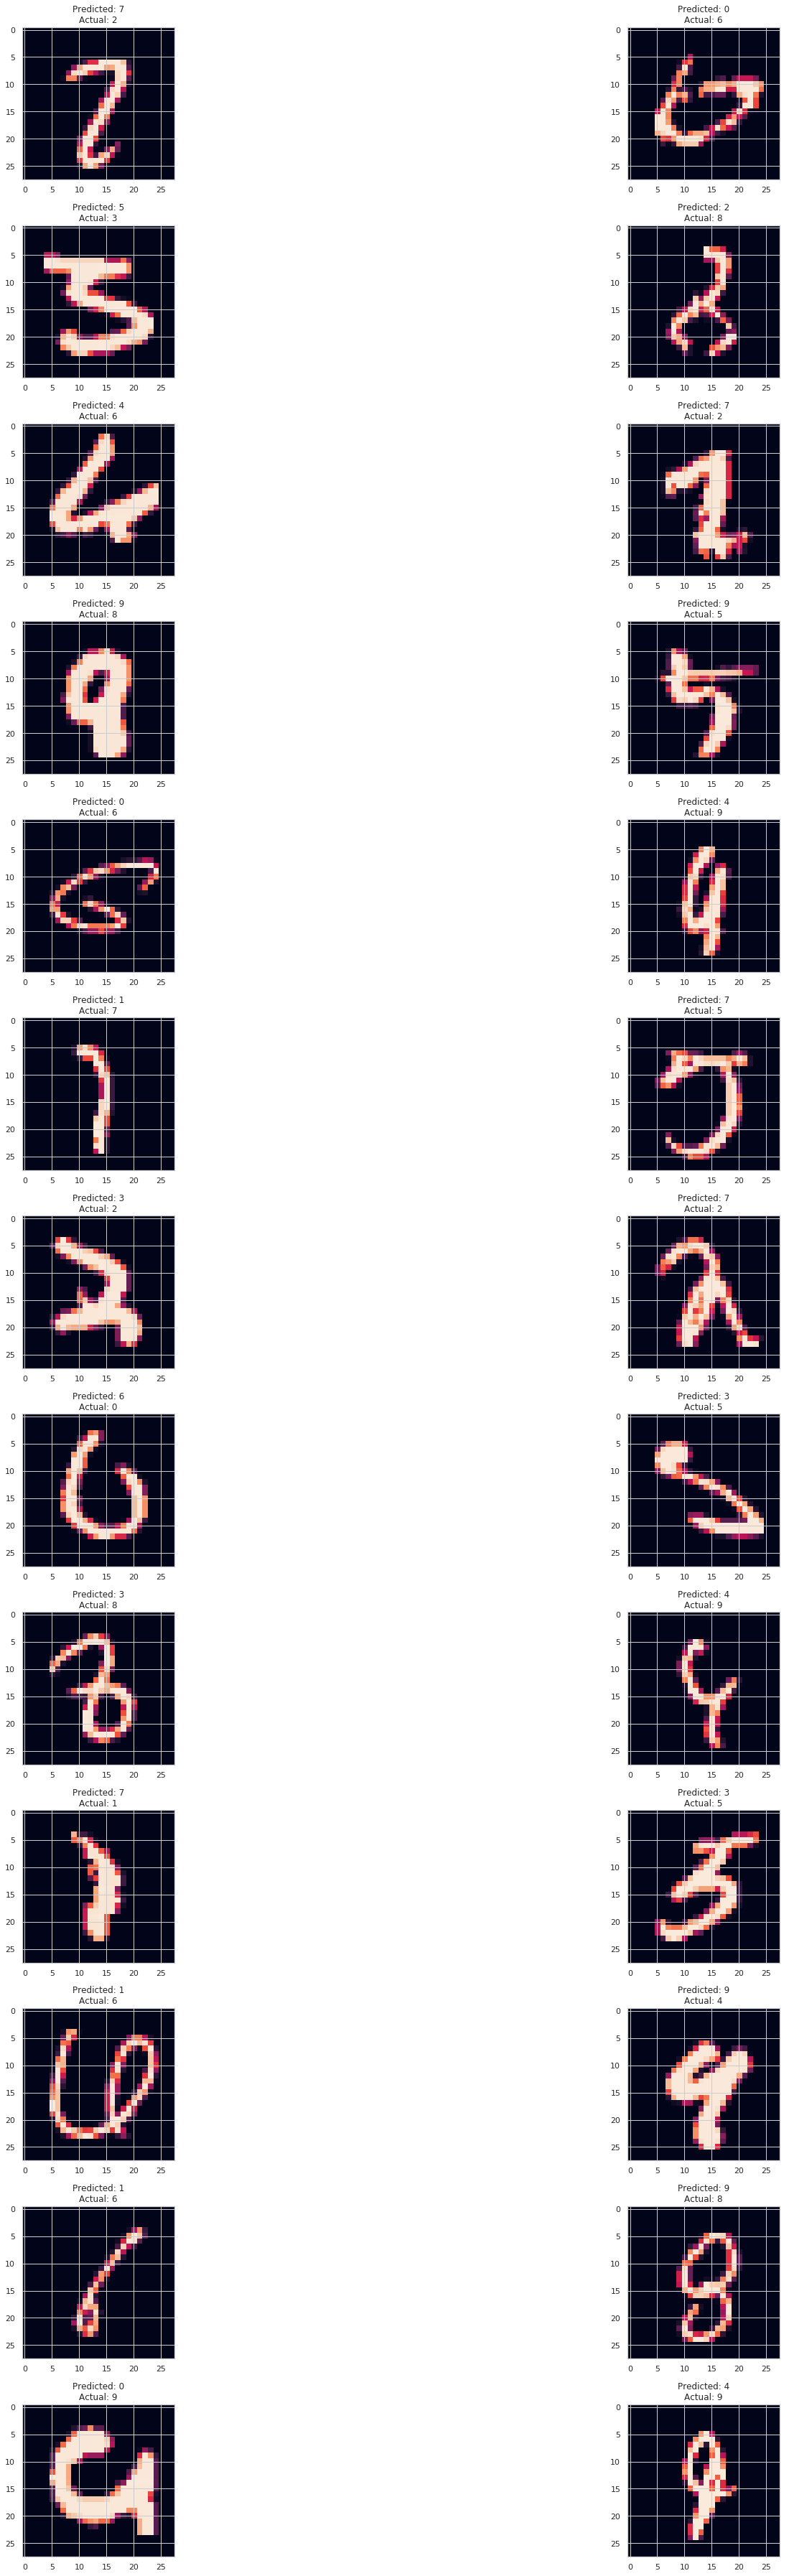

In [107]:
count=0
fig,ax=plt.subplots(13,2)
fig.set_size_inches(50,50)
for i in range (13):
    for j in range (2):
        ax[i,j].imshow(X_test_bkp[mis_class[count]])
        ax[i,j].set_title("Predicted: "+ str(y_pred_digits[mis_class[count]])+ "\n" + "Actual: "+str(y_test[mis_class[count]]))
        plt.tight_layout()
        count+=1

In [0]:
from google.colab import files

for i in range(26):
  img_name = "misclassified_image" + str(mis_class[i]) + r'.png'
  plt.imsave(img_name, X_test_bkp[mis_class[i]])
  files.download(img_name)